In [1]:
#Curvas de aprendizaje y validacion 

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[10,10]

In [33]:
red=pandas.read_csv(r"D:\Estudiar\MLData\wine\winequality-red.csv",sep=";")
white=pandas.read_csv(r"D:\Estudiar\MLData\wine\winequality-white.csv",sep=";")
red["red"]=1
red["white"]=0
white["red"]=0
white["white"]=1

In [34]:
wine=pandas.concat([red,white])
(len(red)+len(white))==len(wine)

True

In [35]:
wine.shape

(6497, 14)

In [36]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


In [37]:
targetName="quality"
trainName=[colName for colName in wine.columns if colName!=targetName]

In [38]:
train=wine[trainName]
target=wine[targetName]

In [39]:
#Curvas de aprendizaje
#Las curvas de aprendezaje mmuestran el score (puntuacion) del estimador tanto al estimar en los datos de entrenamiento como en validacion cruzada, y muestran las variaciones de dichas puntuciones al incrementar el tamaaño de los datos de entrenamiento.
#Esto ayuda a ver si nuestro modelo se podria beneficiar de la obtencion de mas datos de entrenamiento (por que todavia tiene capacidad de "aprender" mas) o si oir el contario, la complejidad del modelo no permite aprender mas sim importar cuantos datos adicionales usemos para entrenar
#Por ejemplo, vamos a ver las curvas de aprendizaje para dos estimadores, Random Forest (Bosques aleatorios) y AdaBoost

In [40]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [41]:
estimate_rf=RandomForestRegressor()
estimate_ab=AdaBoostRegressor()

In [42]:
#La funcion Learning curve tiene un parametro train_size que indica en que puntos queremos partir el dataset de entrenamiento para evaluar el estimador, soporta o enteros, que representanrian tamaños concretos, (por ejemplo, calcular puntos de la curva para 100, 1000, 10000 muestras) o decimales, que representarian porcentajes del tamaño total del dataset (por ejemplo, calcular puntuacion del modelo para el 10%, el 50% y el 100% del dataset)

#Se calculara 10 puntos distribuidos de forma uniforme sobre el total del dataset

In [43]:
#En cuanto a la funcion de predidas, dado que es un problema de regresion podemos usar el Error Cuadratico Medio (MSE). En scikit-learn el MSE se puede usar en todos aquellos casos donde se puede usar el parametro scoring, y se llama neg_mean_squared_error. Se proporciona por defecto con un signo negativo

In [49]:
train_size, train_scores, test_scores=learning_curve(estimate_ab,train,target,cv=5,n_jobs=2,scoring="neg_mean_squared_error",train_sizes=numpy.linspace(0.01,1.,10))

In [50]:
#La funcion learning_curve devuelve 3 arrays, uno con los distintos tamaños del dataset que se haan evaluado, otro con el score de entrenamiento y otro con el score de los datos de validacion cruzada (hemos usado 5 validaciones al especificar cv=5), por lo tanto para valor de train_sizes obtenemos 10 puntuaciones de test y de train

In [53]:
print(train_scores.shape)
print(test_scores.shape)

(10, 5)
(10, 5)


In [54]:
train_size

array([  51,  623, 1195, 1766, 2338, 2910, 3481, 4053, 4625, 5197])

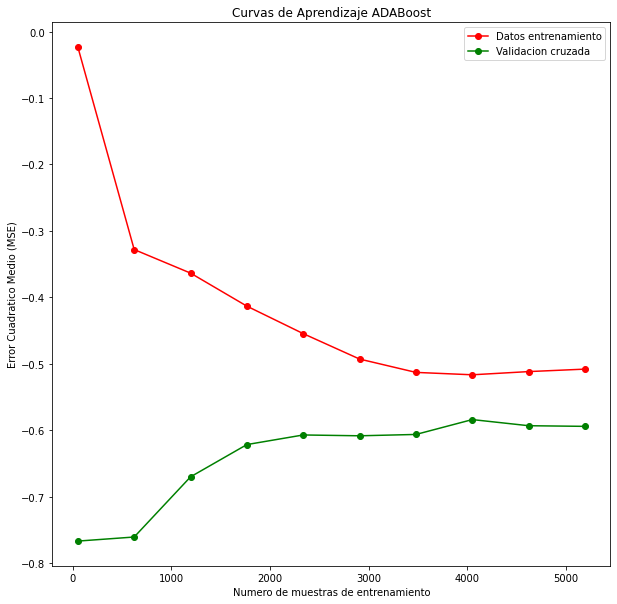

In [58]:
train_scores_mean=numpy.mean(train_scores,axis=1)
test_scores_mean=numpy.mean(test_scores,axis=1)

plt.plot(train_size,train_scores_mean,"o-", color="r",label="Datos entrenamiento")
plt.plot(train_size,test_scores_mean,"o-", color="g",label="Validacion cruzada")
plt.title("Curvas de Aprendizaje ADABoost")
plt.xlabel("Numero de muestras de entrenamiento")
plt.ylabel("Error Cuadratico Medio (MSE)")
plt.legend()

In [59]:
#Como vemos en la grafica, la puntuacion de entrenamiento empieza siendo mucho mas alta que la de los datos de validacion curzada. Sin embargo al incrementar el tamaño del dataset de entrenamiento el modelo empieza a aprender, con lo cual la puntuacion de validacion cruzada comienza a crecer. Llega un punto en el que ambas puntuaciones convergen, esto quiere decir qque para este modelo en particular (ADABoost), añadir mas datos de entrenamiento no va a mejorar el modelo, y necesitamos un modelo mas complejo (que pueda generalizar mas y reducir su sesgo(bias en ingles)) si queremos mejorar los resultados 

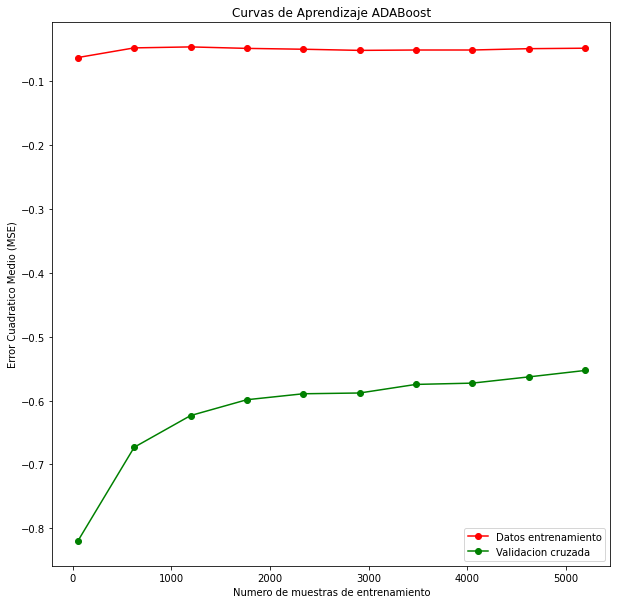

In [60]:
train_size, train_scores, test_scores=learning_curve(estimate_rf,train,target,cv=5,n_jobs=2,scoring="neg_mean_squared_error",train_sizes=numpy.linspace(0.01,1.,10))

train_scores_mean=numpy.mean(train_scores,axis=1)
test_scores_mean=numpy.mean(test_scores,axis=1)

plt.plot(train_size,train_scores_mean,"o-", color="r",label="Datos entrenamiento")
plt.plot(train_size,test_scores_mean,"o-", color="g",label="Validacion cruzada")
plt.title("Curvas de Aprendizaje ADABoost")
plt.xlabel("Numero de muestras de entrenamiento")
plt.ylabel("Error Cuadratico Medio (MSE)")
plt.legend()

In [ ]:
#por el contrario, vemos que el estimador Random Forest podria beneficiarse de mas datos de entrenamiento, que le ayudarian a generalizar mejor (es decir reducir su sesgo(bias))